In [1]:
!nvidia-smi

Fri Oct  8 11:16:31 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.74       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!pip install top2vec
!pip install umap-learn[plot]

In [24]:
import json
import requests
import numpy as np

import umap
import umap.plot
import hdbscan

from top2vec import Top2Vec
np.random.seed(42)

In [6]:
url = 'http://tools.kinds.or.kr:8888/search/news'

datas = {
    "access_key": "9af2f705-2974-4340-8b55-d69040b944ab",

    "argument": {
        "query": {"title":""},
        "published_at": {
            "from": "2021-08-29",
            "until": "2021-10-06"
            },
            "provider": [],
            "category": ["008004000"],
            "category_incident": [""],
            "byline": "",
            "provider_subject": [""],
            "subject_info": [""],
            "subject_info1": [""],
            "subject_info2": [""],
            "subject_info3": [""],
            "subject_info4": [""],
            "sort": {"date": "asc"},
            "hilight": 200,
            "return_from": 0,
            "return_size": 100000,
            "fields": [
                "byline",
                "category",
                "category_incident",
                "provider_news_id",
                "hilight",
                ]
                }
         }

response = requests.post(url, data=json.dumps(datas))
js=response.json()

js

{'result': 0,
 'return_object': {'documents': [{'byline': '이수영',
    'category': ['경제>유통', 'IT_과학>인터넷_SNS', 'IT_과학>콘텐츠'],
    'category_incident': [],
    'dateline': '2021-08-29T00:25:31.000+09:00',
    'enveloped_at': '2021-08-29T00:16:12.000+09:00',
    'hilight': "산지폐기 위기 딛고 ..'완판 행진'… 온라인마켓, 농산물 유통 새 대안 되나 애호박 가격 폭락으로 화천산 애호박의 산지폐기 소식이 알려졌던 지난달 말,기적 같은 일이 벌어졌다... .. .. ..안타까운 소식에 전국의 소비자들의 주문이 쇄도한 것이다.지난달 25일부터 26일 오전까지 하루 사이에 최소 112t의 애호박 주문이 접수됐다.이는 8㎏ 기준 ..",
    'news_id': '01300101.20210828001612001',
    'provider': '강원도민일보',
    'provider_news_id': '1088846',
    'published_at': '2021-08-29T00:00:00.000+09:00',
    'title': "산지폐기 위기 딛고 '완판 행진'… 온라인마켓, 농산물 유통 새 대안 되나"},
   {'byline': '김경은',
    'category': ['경제>유통', 'IT_과학>콘텐츠', '경제>자동차'],
    'category_incident': [],
    'dateline': '2021-08-29T06:02:00.000+09:00',
    'enveloped_at': '2021-08-29T06:03:02.000+09:00',
    'hilight': '[주간 가구 스토리] 새 매장 열고 새 브랜드 론칭… 업계 ..‘공격 행보’ ..‘나’를 꾸민다는 개념은 얼굴과 몸, 패션을 넘어 실내 인테리어까지 확장하고 있습니다

In [7]:
total_hits = js['return_object']['total_hits']
print("결과 개수:",total_hits)

결과 개수: 9653


In [8]:
#total_hits = 10000
# 모든 타이틀
titles, hilights ,ths= [], [], []
for i in range(total_hits):
    title = js['return_object']['documents'][i]['title']
    hilight = js['return_object']['documents'][i]['hilight']
    th = title +","+ hilight

    #titles.append(title)
    #hilights.append(hilight)
    ths.append(th)
len(ths)

9653

In [9]:
model = 0

In [10]:
model = Top2Vec(documents = ths, speed="learn")

2021-10-08 11:19:36,934 - top2vec - INFO - Pre-processing documents for training
2021-10-08 11:19:38,632 - top2vec - INFO - Creating joint document/word embedding
2021-10-08 11:20:15,128 - top2vec - INFO - Creating lower dimension embedding of documents
/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)
2021-10-08 11:20:48,101 - top2vec - INFO - Finding dense areas of documents
2021-10-08 11:20:48,575 - top2vec - INFO - Finding topics


In [11]:
# https://github.com/ddangelov/Top2Vec/blob/master/top2vec/Top2Vec.py
# line 360
model._get_document_vectors()

array([[-0.14275488,  0.13732402, -0.08426899, ..., -0.09736799,
        -0.07995448, -0.06131234],
       [ 0.05081026, -0.00824067, -0.02509266, ..., -0.13947263,
        -0.08093382, -0.04175144],
       [ 0.06447266, -0.10198305, -0.03966831, ...,  0.00233823,
        -0.04646865, -0.00425432],
       ...,
       [-0.03883853,  0.10508302, -0.02772672, ..., -0.01191056,
         0.0018271 ,  0.01638009],
       [ 0.0763969 ,  0.06669741, -0.05541279, ..., -0.01256754,
        -0.08008385, -0.13443902],
       [-0.04821948,  0.01124064,  0.01559813, ..., -0.0799116 ,
        -0.01433242,  0.00644365]], dtype=float32)

In [12]:
umap_args = {'n_neighbors': 15,
             'n_components': 2,
             'metric': 'cosine'}

mapper = umap.UMAP(**umap_args).fit(model._get_document_vectors(norm=False))

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


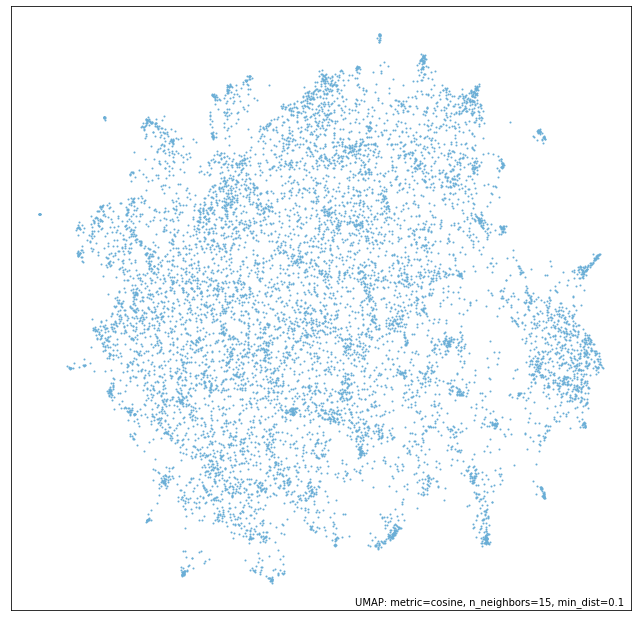

In [13]:
# https://umap-learn.readthedocs.io/en/latest/clustering.html
umap.plot.points(mapper,) 
# color_key {-1:'#000000',0:'#'}

In [70]:
hdbscan_args = {'min_cluster_size': 15,
                'metric': 'euclidean',
                'cluster_selection_method': 'eom'}

cluster = hdbscan.HDBSCAN(**hdbscan_args).fit(mapper.embedding_)

In [71]:
cluster.labels_

array([49, 56, 35, ..., 44, -1, -1])

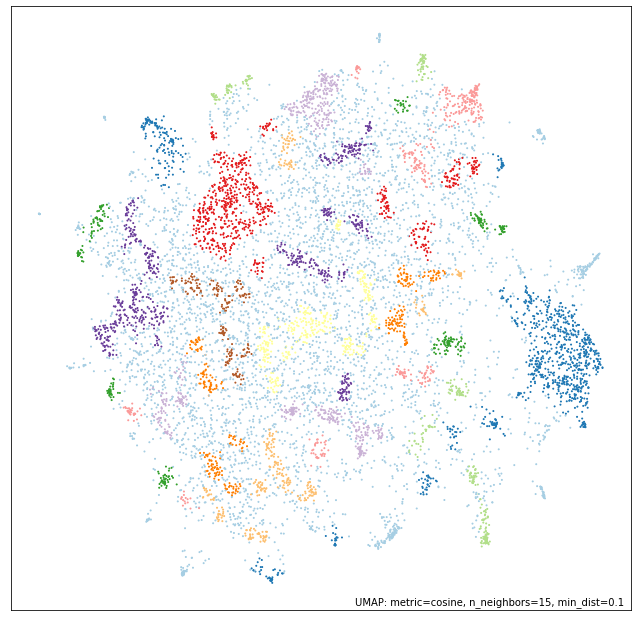

In [72]:
# https://github.com/ddangelov/Top2Vec/blob/master/top2vec/Top2Vec.py
# line 376
#
# https://hdbscan.readthedocs.io/en/latest/how_hdbscan_works.html
umap.plot.points(mapper,cluster.labels_, color_key_cmap='Paired',show_legend=False)

In [73]:
model.get_num_topics()

76

In [74]:
topic_sizes, topic_nums = model.get_topic_sizes()

In [18]:
topic_sizes

array([570, 398, 286, 276, 266, 246, 233, 216, 202, 189, 175, 173, 171,
       164, 164, 158, 154, 153, 152, 138, 136, 134, 132, 132, 131, 129,
       124, 124, 123, 122, 121, 118, 118, 117, 117, 116, 111, 107, 102,
       101, 100,  99,  99,  97,  95,  95,  94,  88,  88,  87,  87,  86,
        86,  85,  84,  83,  79,  78,  78,  75,  73,  71,  69,  68,  68,
        67,  66,  64,  62,  61,  60,  59,  55,  51,  50,  47])

In [19]:
topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=['넷플릭스'], num_topics=5)

In [20]:
topic_nums

array([ 0, 30, 48, 69, 14])

In [21]:
topic_scores

array([0.87390832, 0.56398355, 0.4452034 , 0.37077709, 0.36625472])

In [75]:
def keyword_extract(doc):
    url = 'http://tools.kinds.or.kr:8888/feature'

    datas = {
        "access_key": "9af2f705-2974-4340-8b55-d69040b944ab",
        "argument": {
            "title": "", 
            "sub_title": "", 
            "content": 
            f"""
            {doc}
            """
            }
    }

    response = requests.post(url, data=json.dumps(datas))
    my_list = response.json()['return_object']['result']['content'].split()
    keywords=[]
    for i in my_list:
        if float(i.split("|")[1]) > 0.04:
            keywords.append(i.split("|")[0].replace("_",""))
    return keywords

In [68]:
cluster = {
    '000001':{'cluster_name': "오징어게임",'cluster_tag': topic_words[0],'articles':[]},
}


articles = []
topic_words, word_scores, topic_nums = model.get_topics()
top_ten = list(topic_words[0][:11])

documents, document_scores, document_ids = model.search_documents_by_topic(topic_num=0, num_docs=5)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    if score >= 0.4:
        #print(f"Document: {doc_id}, Score: {score}")
        #print("-----------")
        #print(doc)
        #print("-----------")
        print()
        #print(keyword_extract(doc))
        temp = []
        article_keyword=keyword_extract(doc)
        #print(article_keyword)
        x = article_keyword + top_ten
        x = list(set(x))
        articles = {'doc_id':doc_id,'tag':x,'doc':doc}
        cluster['000001']['articles'].append(articles)


    
cluster

{'000001': {'articles': [{'doc': '‘오징어게임’, 전세계 넷플릭스 1위 올랐다... 한국 드라마 최초,‘오징어게임’, 전세계 넷플릭스 1위 올랐다..... 한국 드라마 최초 넷플릭스 오리지널 시리즈 ..‘오징어 게임’이 국내 드라마 최초로 전 세계 넷플릭스 1위를 차지했다... .. .. .. ..플릭스패트롤에 따르면, 지난 17일 공개된 넷플릭스 오리지널 시리즈 ..‘오징어 게임’은 24일(현지시각) 전체 순위 1위를 차지했다... 2위는 ..‘오티스..',
    'doc_id': 6494,
    'tag': ['세계적인',
     '넷플릭스',
     '위에',
     '현지시각',
     '집계',
     '1위',
     '세계넷플릭스1위',
     '넷플릭스에서',
     '시리즈',
     '한국드라마',
     '17일공개',
     '드라마',
     '시리즈오징어',
     '전체순위1위',
     '차지했다',
     '올랐다',
     '세계넷플릭스',
     '오징어게임',
     '넷플릭스오리지널',
     '2위',
     '순위',
     '플릭스패트롤',
     '공개된']},
   {'doc': "글로벌 열풍…'오징어게임' 전세계 넷플릭스 드라마 1위,글로벌 열풍…'오징어게임' 전세계 넷플릭스 드라마 1위 국내외에서 엄청난 인기를 끌고 있는 넷플릭스 오리지널 시리즈 ..‘오징어 게임’이 한국 드라마 최초로 전 세계 넷플릭스 1위를 올랐다... .. .. .. ..24일(현지 시간) 플릭스패트롤에 따르면 지난 17일 공개된 넷플릭스 오리지널 시리즈 오징어 게임은 전체 순위 1위를 차지했다... 2위는 ..",
    'doc_id': 6498,
    'tag': ['세계적인',
     '넷플릭스',
     '위에',
     '집계',
     '1위',
     '세계넷플릭스1위',
     '넷플릭스에서',
     '드라마1위',
     '시리즈',
